In [2]:
#Alle benodigde libraries importen.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import statistics

In [3]:
#Onze data van het experiment importeren en printen.
df = pd.read_excel(r'project2.2data.xlsx')
print(df)

               CH1       Unnamed: 1  Unnamed: 2  Unnamed: 3           0  10.4
0        Frequency                ?         NaN         NaN         2.0  10.4
1           Period                ?         NaN         NaN   4000000.0   8.4
2            PK-PK         119.2mv?         NaN         NaN   6000000.0   5.2
3               SP  2000000.00000uS         NaN         NaN   8000000.0   5.6
4         Time(uS)      Voltage(mV)         NaN         NaN  10000000.0   4.8
...            ...              ...         ...         ...         ...   ...
5143   19989999616         50.79999         NaN         NaN         NaN   NaN
5144   19992000512         50.79999         NaN         NaN         NaN   NaN
5145   19993999360         50.79999         NaN         NaN         NaN   NaN
5146   19996000256         50.79999         NaN         NaN         NaN   NaN
5147  19997.999104         50.79999         NaN         NaN         NaN   NaN

[5148 rows x 6 columns]


In [4]:
#Data zetten in een NumPy array.
data = np.array(df)

In [5]:
#De voltage data uit de NumPy array halen.
volt = data[5:-50, 1]

In [6]:
#De tijd uitrekenen, onze meting duurde in totaal 20 minuten.
tijd = []
totaaltijd = 20*60

for x in range(len(volt)):
    delta = totaaltijd/len(volt)
    tijd.append(x * delta)

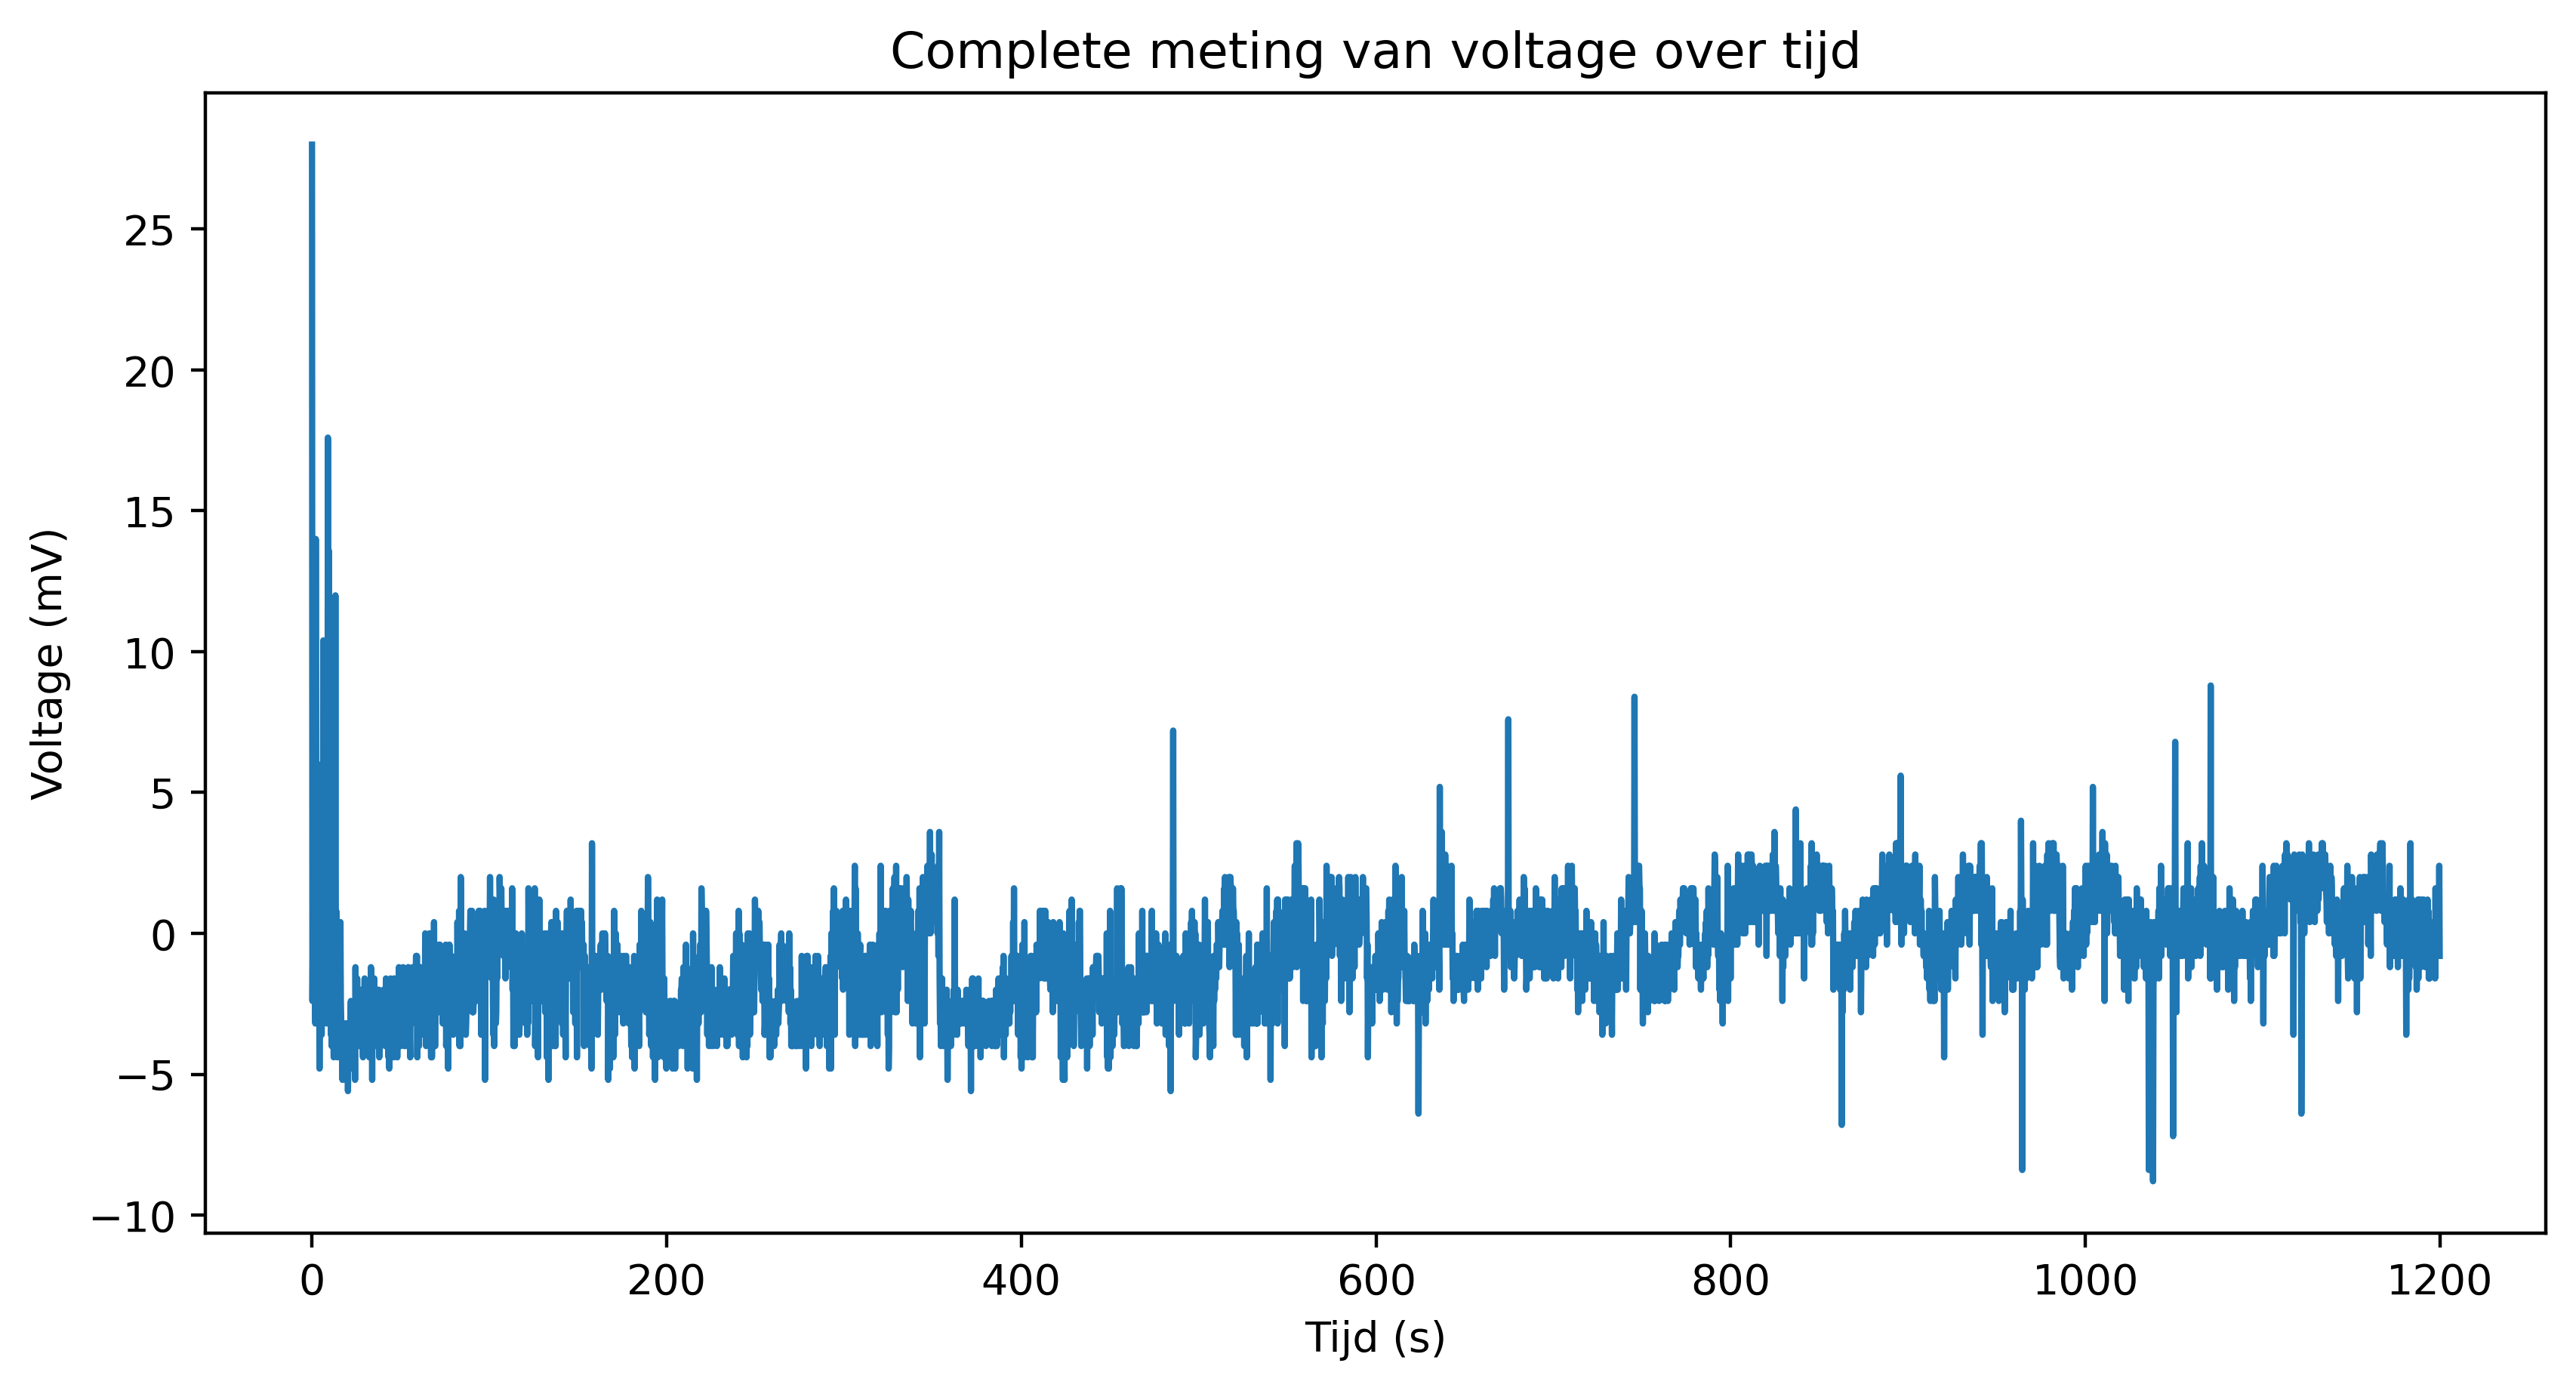

In [7]:
#Plot maken van de data.
plt.figure(figsize=(10, 5), dpi=400)
plt.title("Complete meting van voltage over tijd")
plt.xlabel("Tijd (s)")
plt.ylabel("Voltage (mV)")
plt.plot(tijd, volt)

In [10]:
#Een lijst maken waarin alle medianen worden bijgehouden.
medianen_lijst = []

# Per 10 datapunten van volt de mediaan nemen en deze opslaan in de lijst.
for i in range(0, len(volt), 10):
    sub_lijst = volt[i:i+10]
    mediaan = statistics.median(sub_lijst)
    medianen_lijst.append(mediaan)

In [15]:
#Zorgen dat alles gereset wordt wanneer de code opnieuw wordt gerund
hoeveel = 0
g = 0
bubbels_tijd = []
bubbels_lijst = []
bubbels = 0

#Per waarde van volt checken als hij ruim boven de mediaan zit, per definitie is hier een bel wanneer het verschil tussen de
#waarde van volt en de bijbehoorende mediaan groter is dan 5.
for i in range(len(volt)):
    hoeveel += 1
    verschil = volt[i] - medianen_lijst[g]
    if (abs(verschil) > 5):
        bubbels += 1
        bubbels_lijst.append(bubbels)
        bubbels_tijd.append(tijd[i])
    if (hoeveel == 10):
        hoeveel = 0
        g += 1

In [16]:
#Alle tijden waarop bubbels zijn printen
print(bubbels_tijd)

[0.0, 0.9424700569408992, 1.4137050854113489, 2.120557628117023, 4.241115256234046, 5.419202827410171, 6.36167288435107, 7.068525427056745, 8.482230512468092, 8.953465540938543, 9.424700569408992, 13.19458079717259, 157.86373453760064, 353.66188886707243, 485.60769683879835, 635.9316709208717, 674.5729432554486, 745.7294325544865, 862.595719615158, 964.3824857647752, 1035.7745925780482, 1038.1307677204006, 1049.4404084036912, 1050.6184959748675, 1070.6459846848616, 1117.298252503436, 1121.7749852739053]


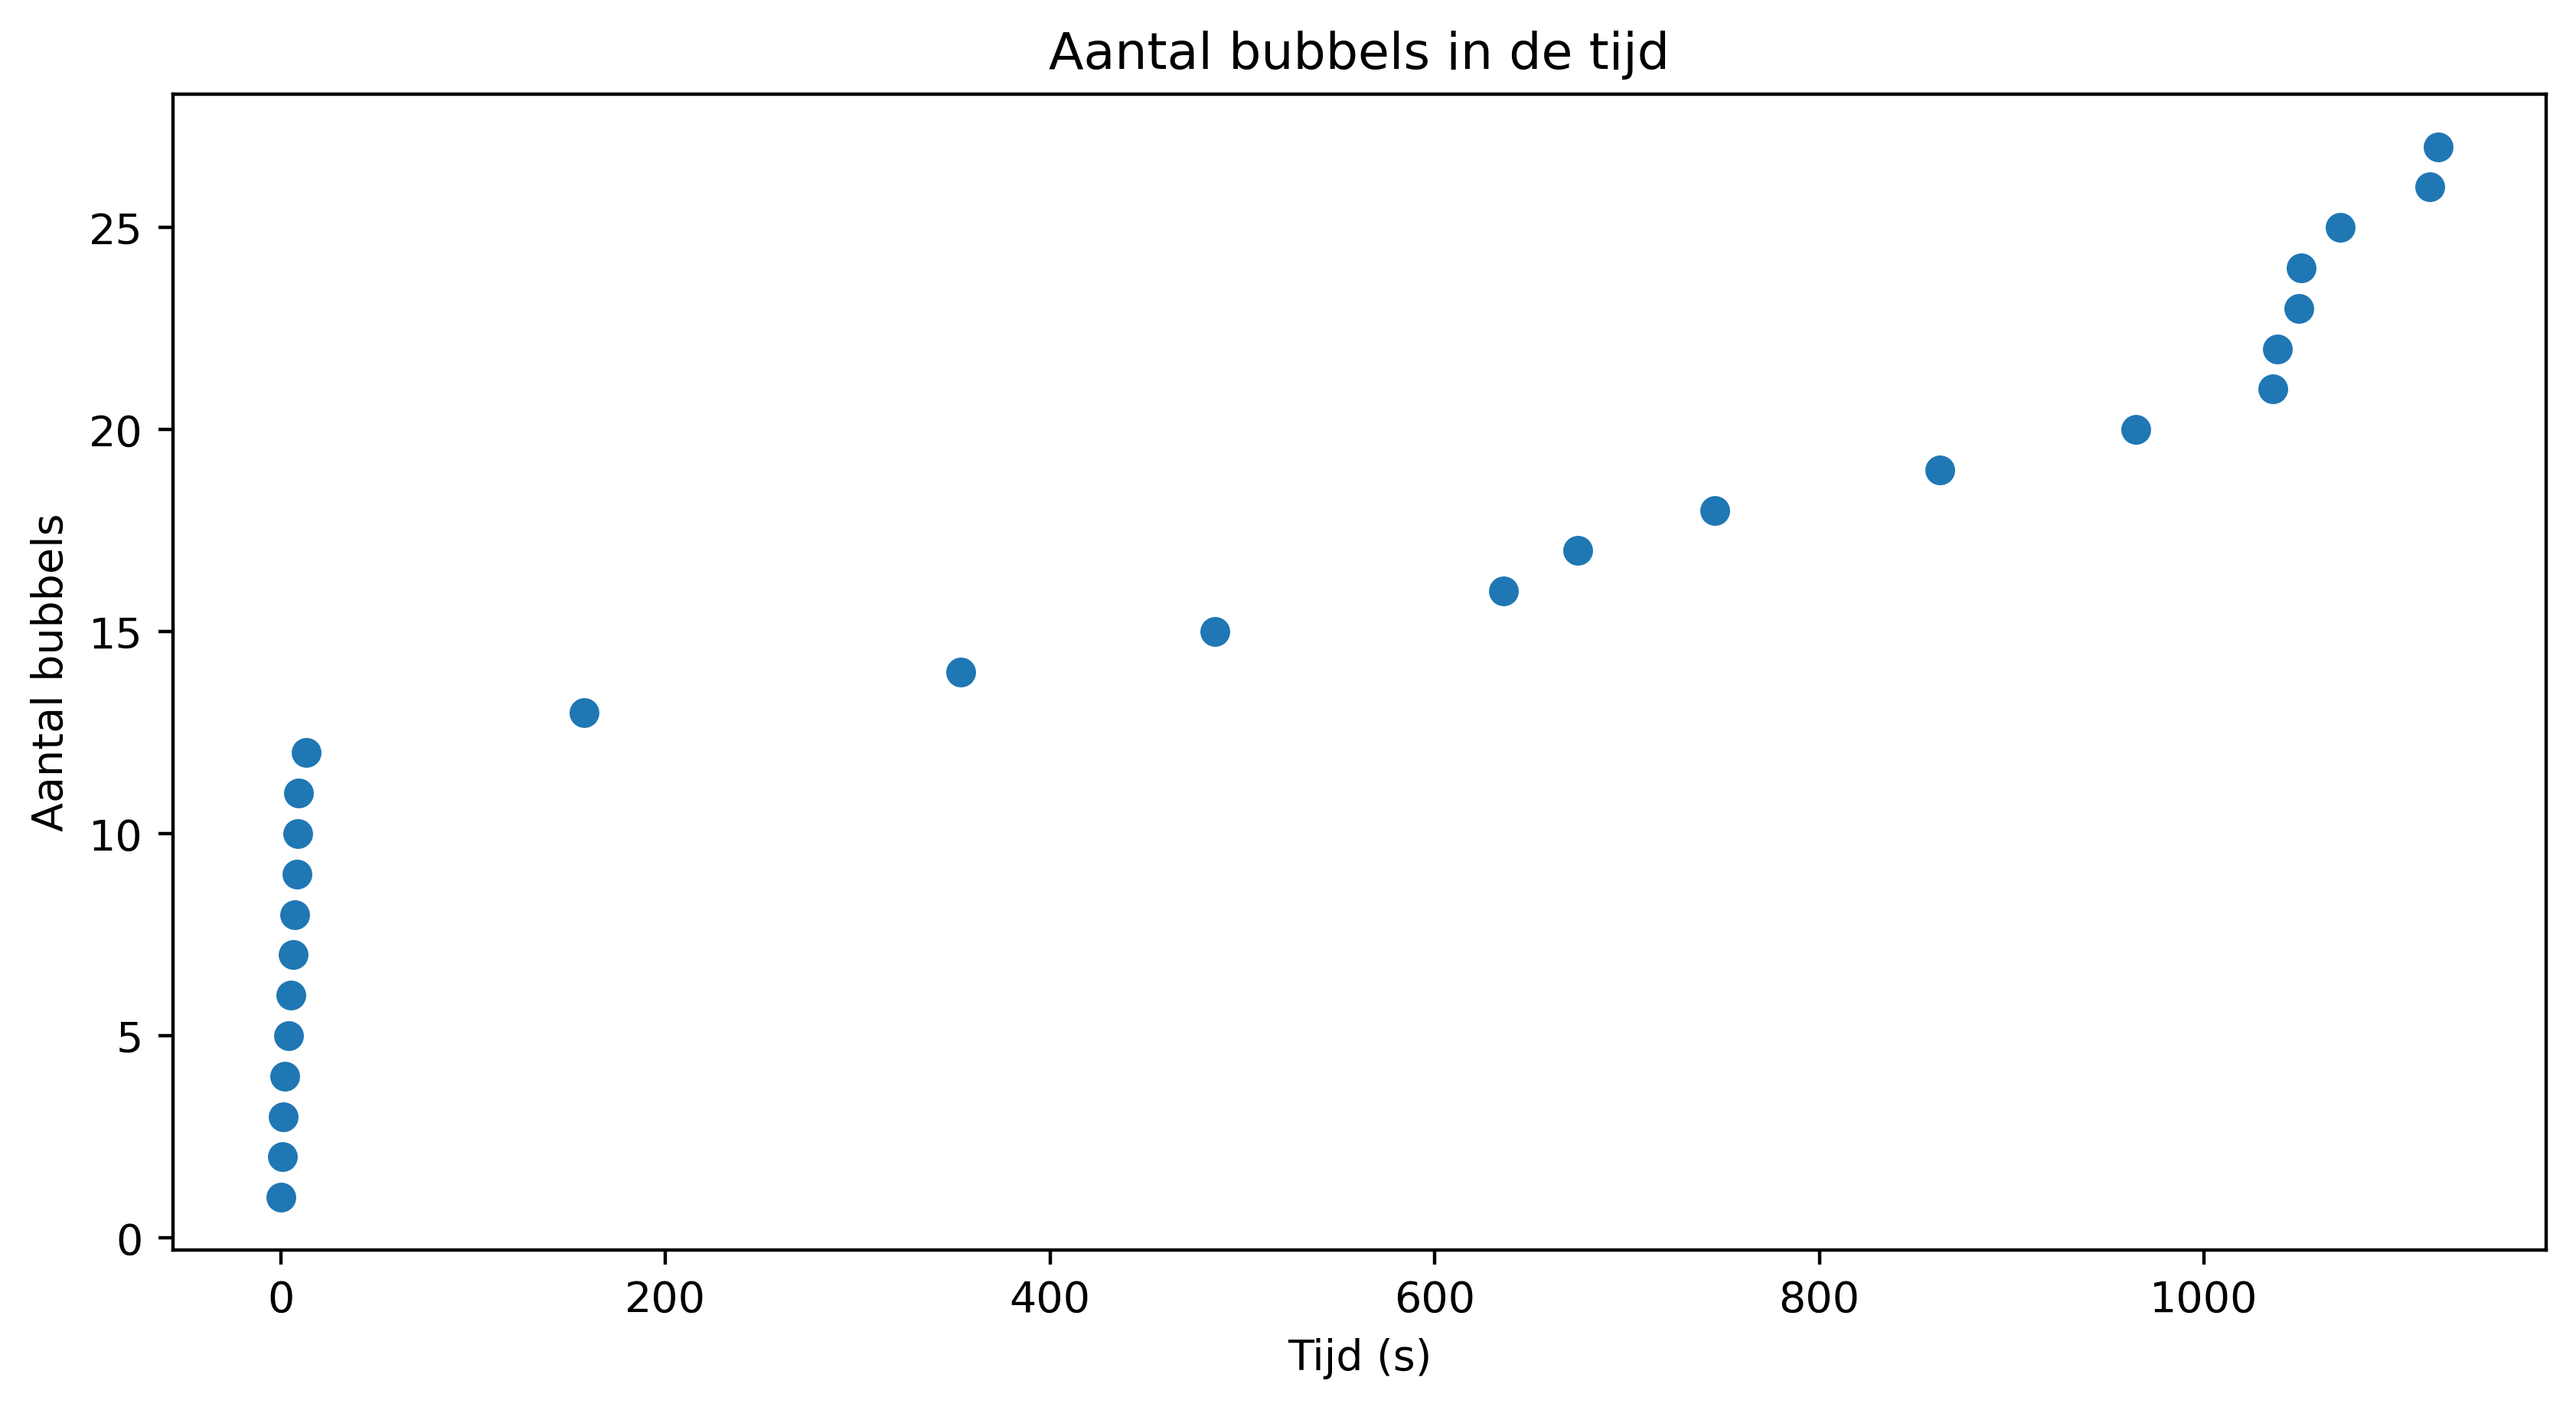

In [17]:
#Plot van het aantal bubbels over de tijd
plt.figure(figsize=(10, 5), dpi=400)
plt.title("Aantal bubbels in de tijd")
plt.xlabel("Tijd (s)")
plt.ylabel("Aantal bubbels")
plt.scatter(bubbels_tijd, bubbels_lijst)
plt.show()

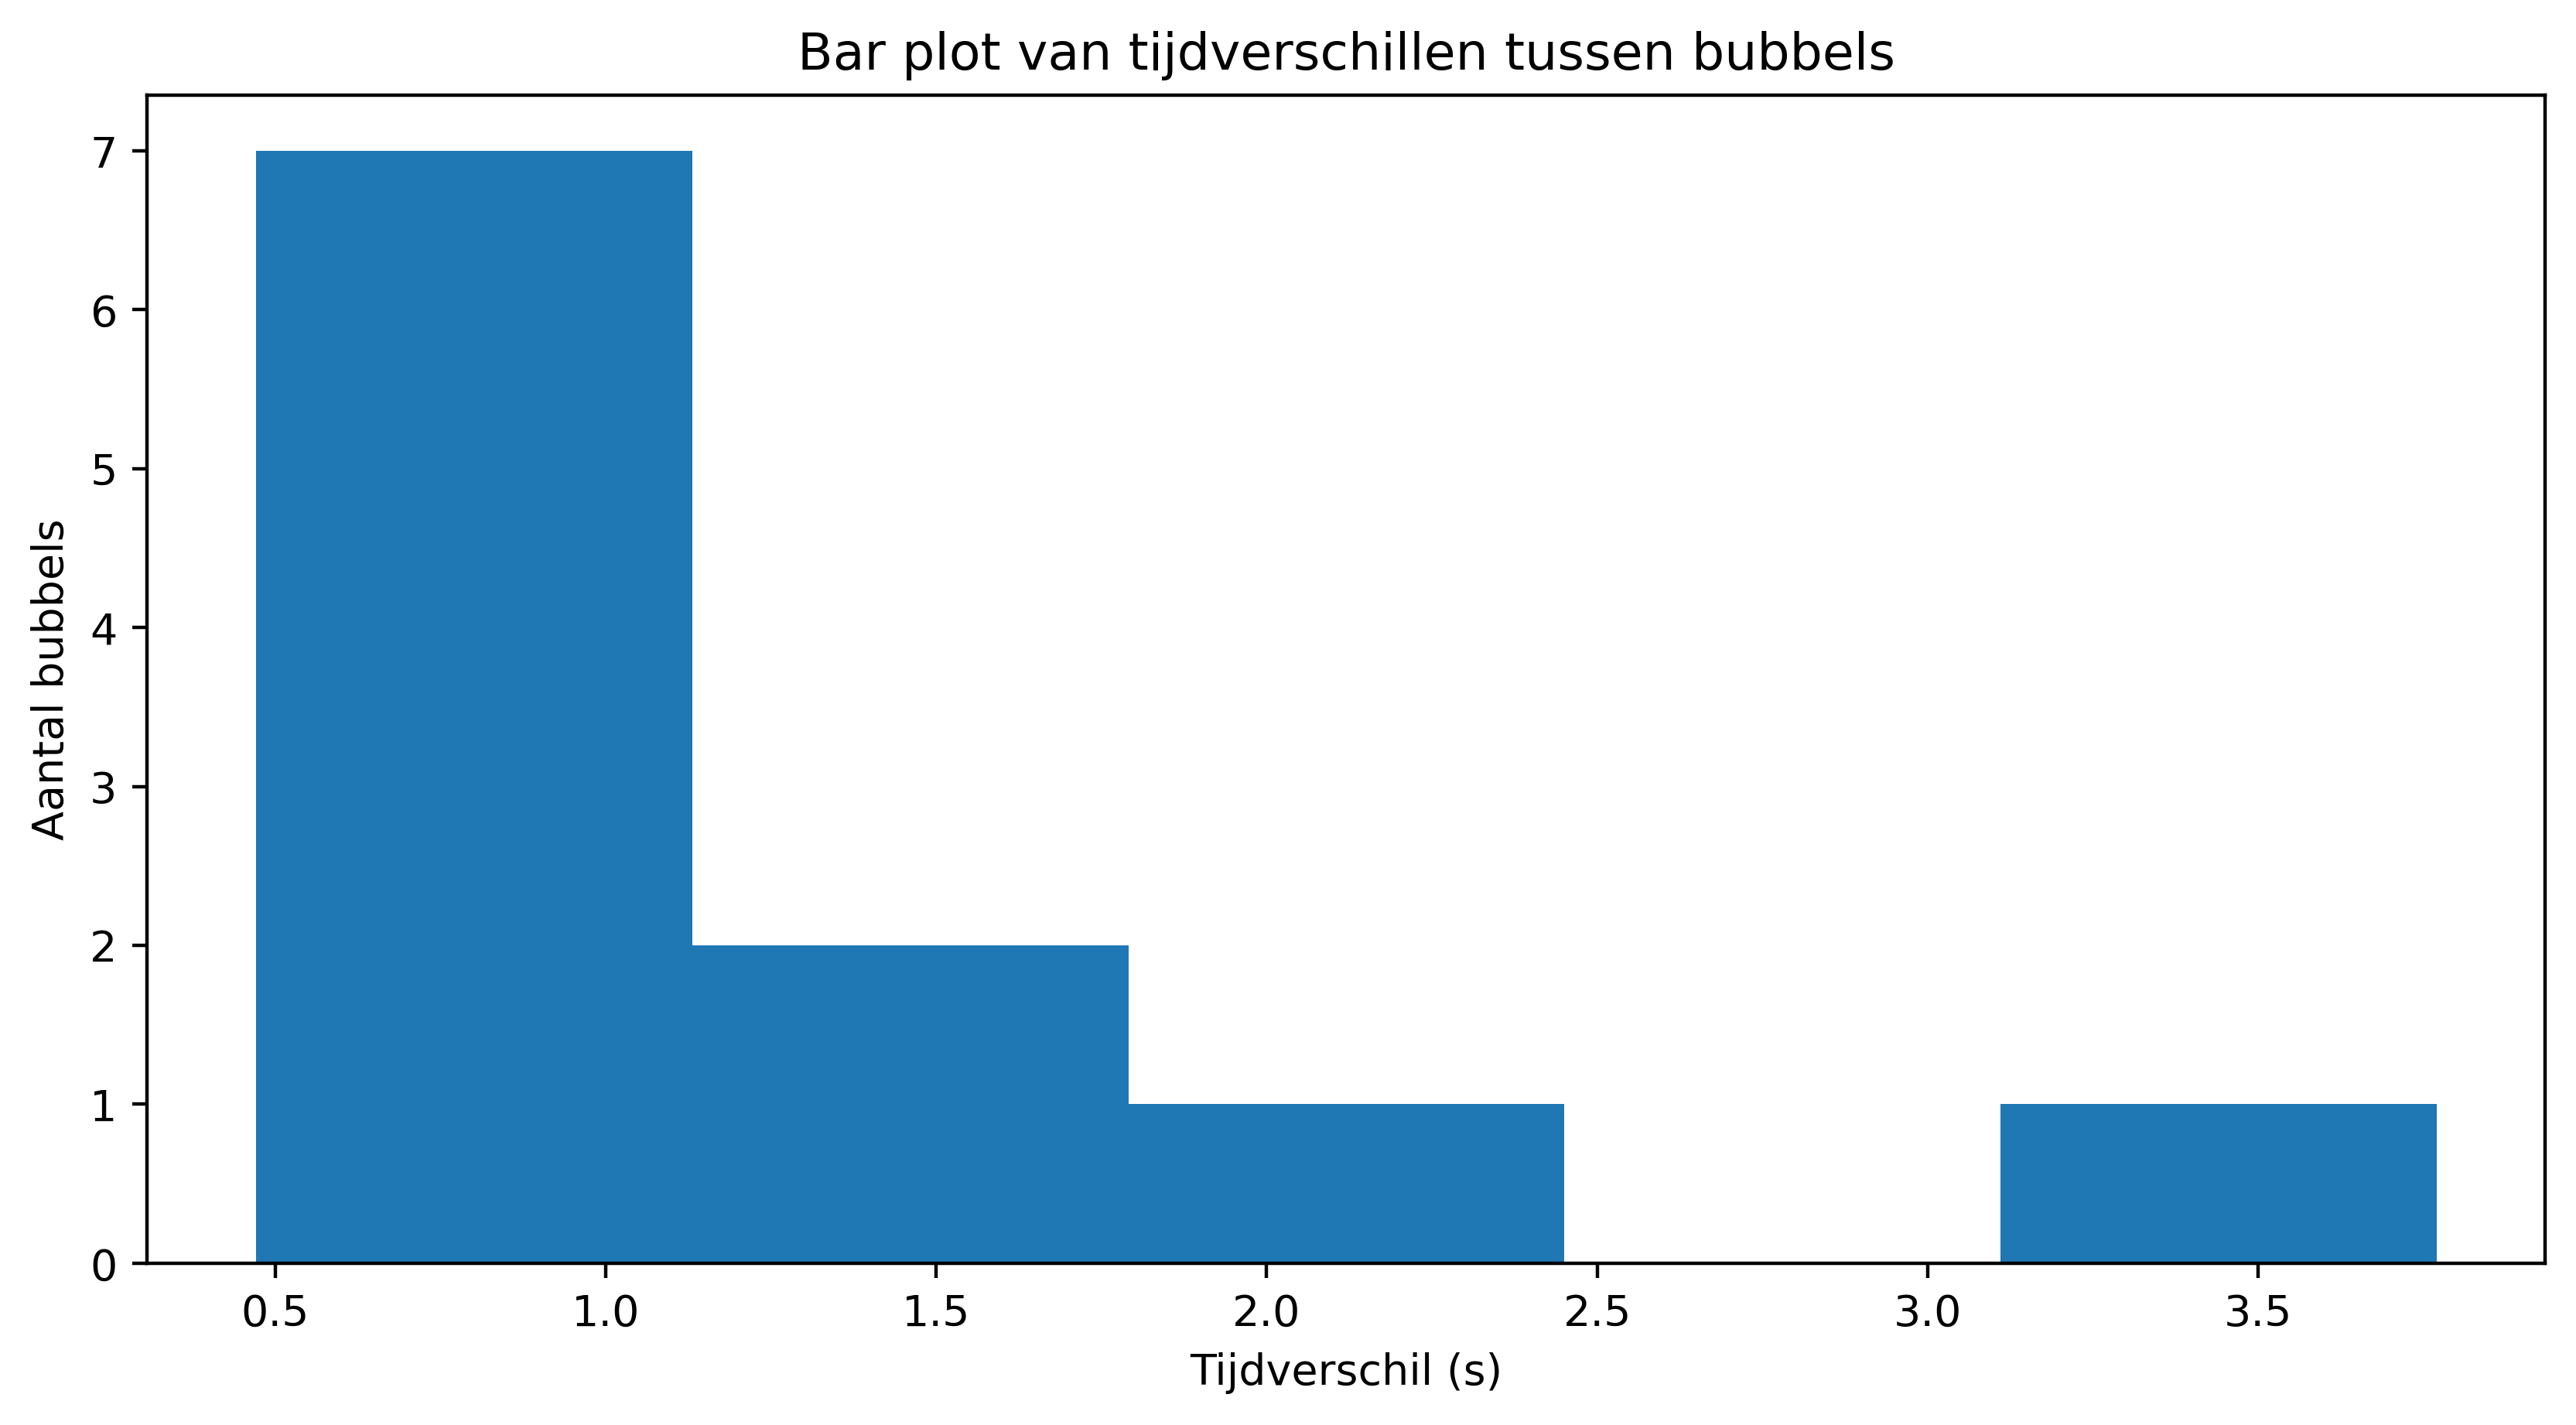

In [34]:
#Verschil in tijd tussen de bubbels van de eerste 100 seconden uit zetten in een nieuwe lijst
df = np.diff(bubbels_tijd[0:12])

#Deze plotten in een bar plot
plt.figure(figsize=(10, 5), dpi=400)
plt.title("Bar plot van tijdverschillen tussen bubbels")
plt.xlabel("Tijdverschil (s)")
plt.ylabel("Aantal bubbels")
plt.hist(df, bins = 5)
plt.show()